In [6]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [8]:
%sql ibm_db_sa://rkh34442:kd2rhlznxp4zw%2Bp5@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB

In [9]:
data = %sql select * from employees

 * ibm_db_sa://rkh34442:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


In [10]:
df = data.DataFrame()

In [11]:
df.shape

(107, 11)

In [12]:
df.head()

,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,commission_pct,manager_id,department_id
0,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000.00,None,NaN,90.0
1,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000.00,None,100.0,90.0
2,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000.00,None,100.0,90.0
3,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000.00,None,102.0,60.0
4,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000.00,None,103.0,60.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   employee_id     107 non-null    int64         
 1   first_name      107 non-null    object        
 2   last_name       107 non-null    object        
 3   email           107 non-null    object        
 4   phone_number    107 non-null    object        
 5   hire_date       107 non-null    datetime64[ns]
 6   job_id          107 non-null    object        
 7   salary          107 non-null    object        
 8   commission_pct  35 non-null     object        
 9   manager_id      106 non-null    float64       
 10  department_id   106 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 9.3+ KB


In [20]:
df['salary'] = df['salary'].map(lambda x: float(x))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   employee_id     107 non-null    int64         
 1   first_name      107 non-null    object        
 2   last_name       107 non-null    object        
 3   email           107 non-null    object        
 4   phone_number    107 non-null    object        
 5   hire_date       107 non-null    datetime64[ns]
 6   job_id          107 non-null    object        
 7   salary          107 non-null    float64       
 8   commission_pct  35 non-null     object        
 9   manager_id      106 non-null    float64       
 10  department_id   106 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 9.3+ KB


In [22]:
import seaborn as sns

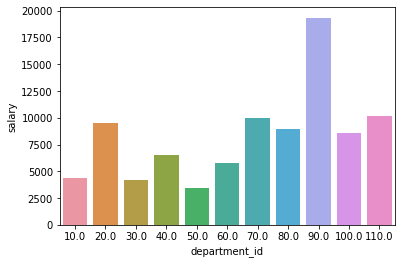

In [24]:
sns.barplot(data=df, x='department_id', y='salary', ci=None);

In [25]:
df.groupby('department_id').salary.mean()

department_id
10.0      4400.000000
20.0      9500.000000
30.0      4150.000000
40.0      6500.000000
50.0      3475.555556
60.0      5760.000000
70.0     10000.000000
80.0      8955.882353
90.0     19333.333333
100.0     8601.333333
110.0    10154.000000
Name: salary, dtype: float64

In [29]:
df_ = df.groupby('department_id').salary.sum().reset_index()
df_

,department_id,salary
0,10.0,4400.0
1,20.0,19000.0
2,30.0,24900.0
3,40.0,6500.0
4,50.0,156400.0
5,60.0,28800.0
6,70.0,10000.0
7,80.0,304500.0
8,90.0,58000.0
9,100.0,51608.0


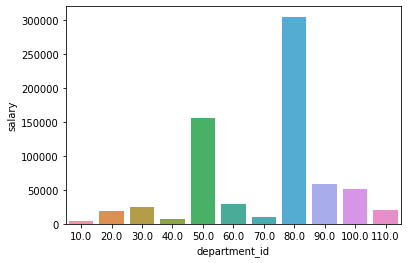

In [30]:
sns.barplot(data=df_, x='department_id', y='salary', ci=None);